# Import Important Library

In [ ]:
!pip install datasets

In [2]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import Dataset

#1. Review Classification



#Load and preprocess dataset

In [3]:
df = pd.read_csv("/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:06:48.451Z,2017-06-07T08:20:48.408Z",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025900/review...,This is a great tablet for the price. Amazon i...,Good product,litle,"https://www.barcodable.com/upc/841667103150,ht..."
4996,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:07:00.236Z,2017-06-07T08:20:55.199Z",True,NaN,1,5,http://reviews.bestbuy.com/3545/5025900/review...,This table

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

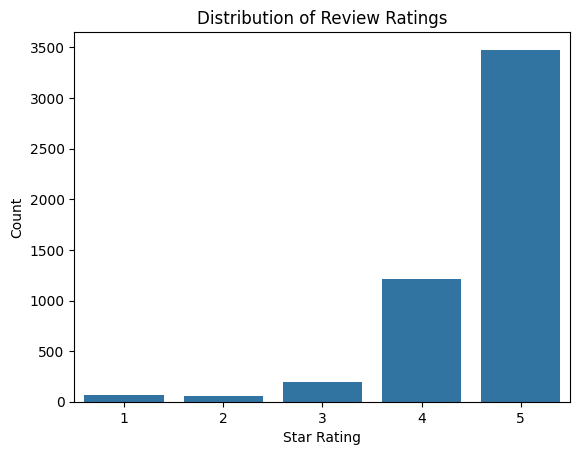

In [4]:
sns.countplot(x='reviews.rating', data=df)
plt.title("Distribution of Review Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()


In [7]:
df = df[['reviews.text', 'reviews.rating']]
df = df.dropna()

In [8]:
df.head()

,reviews.text,reviews.rating
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5


# Mapping Star Ratings to Sentiment Classes

In [9]:
def map_sentiment(rate):
    if rate in [1, 2]:
        return 0  # Negative
    elif rate == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

In [10]:
df['label'] = df['reviews.rating'].apply(map_sentiment)

In [11]:
df.head()

,reviews.text,reviews.rating,label
0,I thought it would be as big as small paper bu...,3,1
1,This kindle is light and easy to use especiall...,5,2
2,Didnt know how much i'd use a kindle so went f...,4,2
3,I am 100 happy with my purchase. I caught it o...,5,2
4,Solid entry level Kindle. Great for kids. Gift...,5,2


In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [12]:
dataset = Dataset.from_pandas(df[['reviews.text', 'label']].rename(columns={'reviews.text': 'text'}))

In [ ]:
def tokenize(example):
    return tokenizer(example['text'], truncation=True, padding=True)

dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

# Train/test split


In [ ]:
dataset = dataset.train_test_split(test_size=0.2)
train_dataset = dataset['train']
test_dataset = dataset['test']

# Load and Train Model

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    logging_steps=10,
)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

<ipython-input-17-f593eba641e5>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: renwasadik (renwasadik-university-of-jeddah) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.123600,0.171884,0.949000,0.915859,0.949000,0.932135
2,0.113500,0.182956,0.953000,0.939806,0.953000,0.943305
3,0.050100,0.173801,0.954000,0.949184,0.954000,0.950548


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=750, training_loss=0.15771185185511907, metrics={'train_runtime': 644.1219, 'train_samples_per_second': 18.63, 'train_steps_per_second': 1.164, 'total_flos': 1589637132288000.0, 'train_loss': 0.15771185185511907, 'epoch': 3.0})

# Model Evaluating

In [ ]:
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 0.17188382148742676, 'eval_accuracy': 0.949, 'eval_precision': 0.9158586065573772, 'eval_recall': 0.949, 'eval_f1': 0.9321346704235351, 'eval_runtime': 16.0935, 'eval_samples_per_second': 62.137, 'eval_steps_per_second': 3.915, 'epoch': 3.0}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

              precision    recall  f1-score   support

    Negative       0.50      0.52      0.51        23
     Neutral       0.00      0.00      0.00        35
    Positive       0.96      0.99      0.98       942

    accuracy                           0.95      1000
   macro avg       0.49      0.51      0.50      1000
weighted avg       0.92      0.95      0.93      1000



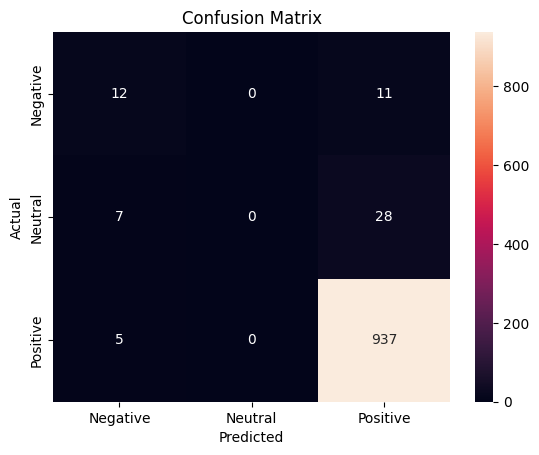

In [ ]:
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

print(classification_report(labels, preds, target_names=["Negative", "Neutral", "Positive"]))

#Confusion Matrix
cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save model and tokenizer
model.save_pretrained("./sentiment-model")
tokenizer.save_pretrained("./sentiment-model")


('./sentiment-model/tokenizer_config.json',
 './sentiment-model/special_tokens_map.json',
 './sentiment-model/vocab.txt',
 './sentiment-model/added_tokens.json',
 './sentiment-model/tokenizer.json')

# Try upsampling negative/neutral samples to make balance

In [ ]:
# Split training dataset by class
neg = train_dataset.filter(lambda x: x['label'] == 0)
neu = train_dataset.filter(lambda x: x['label'] == 1)
pos = train_dataset.filter(lambda x: x['label'] == 2)

# Find the max
max_size = max(len(neg), len(neu), len(pos))

# upsample function
def upsample(dataset, target_size):
    dataset = dataset.shuffle(seed=42)
    indices = [i % len(dataset) for i in range(target_size)]
    return dataset.select(indices)

# Upsample the smaller classes
upsampled_neg = upsample(neg, max_size)
upsampled_neu = upsample(neu, max_size)
upsampled_pos = pos

from datasets import concatenate_datasets
train_dataset_balanced = concatenate_datasets([upsampled_neg, upsampled_neu, upsampled_pos]).shuffle(seed=42)


Filter:   0%|          | 0/4000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/4000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/4000 [00:00<?, ? examples/s]

In [ ]:
balanced_df = train_dataset_balanced.to_pandas()
# Check how many examples per class
balanced_df['label'].value_counts()

,count
label,
2,3744
1,3744
0,3744


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_balanced,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


<ipython-input-29-eec29bd811cc>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.037300,0.294293,0.949000,0.942644,0.949000,0.944929
2,0.043500,0.364748,0.958000,0.948979,0.958000,0.950641
3,0.000100,0.387835,0.956000,0.949073,0.956000,0.951612


TrainOutput(global_step=2106, training_loss=0.04565538487435608, metrics={'train_runtime': 1675.8061, 'train_samples_per_second': 20.107, 'train_steps_per_second': 1.257, 'total_flos': 4463701067464704.0, 'train_loss': 0.04565538487435608, 'epoch': 3.0})

{'eval_loss': 0.2942928969860077, 'eval_accuracy': 0.949, 'eval_precision': 0.94264367122864, 'eval_recall': 0.949, 'eval_f1': 0.9449288285229203, 'eval_runtime': 15.9941, 'eval_samples_per_second': 62.523, 'eval_steps_per_second': 3.939, 'epoch': 3.0}
              precision    recall  f1-score   support

    Negative       0.73      0.48      0.58        23
     Neutral       0.41      0.31      0.35        35
    Positive       0.97      0.98      0.98       942

    accuracy                           0.95      1000
   macro avg       0.70      0.59      0.64      1000
weighted avg       0.94      0.95      0.94      1000



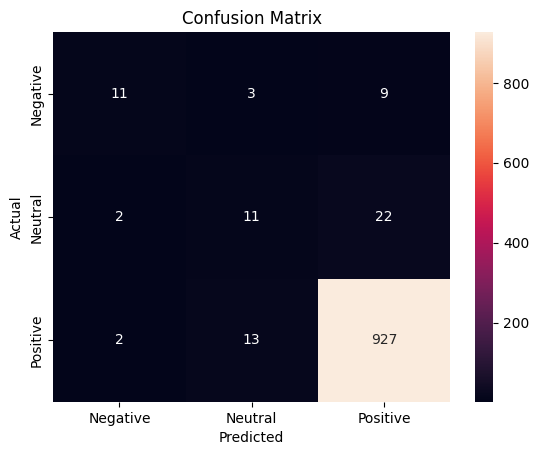

In [ ]:
metrics = trainer.evaluate()
print(metrics)

predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(labels, preds, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model and tokenizer
model.save_pretrained("./sentiment-model-balanced")
tokenizer.save_pretrained("./sentiment-model-balanced")

('./sentiment-model-balanced/tokenizer_config.json',
 './sentiment-model-balanced/special_tokens_map.json',
 './sentiment-model-balanced/vocab.txt',
 './sentiment-model-balanced/added_tokens.json',
 './sentiment-model-balanced/tokenizer.json')

# Try Roberte Model

In [5]:
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification

tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [13]:
def tokenize(example):
    return tokenizer(example['text'], truncation=True, padding=True)

dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_balanced,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


<ipython-input-22-55afe22e9d21>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: renwasadik (renwasadik-university-of-jeddah) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.108000,0.347743,0.943000,0.953979,0.943000,0.947819
2,0.025000,0.319723,0.960000,0.962413,0.960000,0.958992
3,0.000100,0.383877,0.957000,0.956285,0.957000,0.955768


TrainOutput(global_step=2109, training_loss=0.0859432092513633, metrics={'train_runtime': 3299.1104, 'train_samples_per_second': 10.216, 'train_steps_per_second': 0.639, 'total_flos': 8868237744522240.0, 'train_loss': 0.0859432092513633, 'epoch': 3.0})

{'eval_loss': 0.3197232782840729, 'eval_accuracy': 0.96, 'eval_precision': 0.9624131536182009, 'eval_recall': 0.96, 'eval_f1': 0.9589916752903641, 'eval_runtime': 28.0487, 'eval_samples_per_second': 35.652, 'eval_steps_per_second': 2.246, 'epoch': 3.0}
              precision    recall  f1-score   support

    Negative       1.00      0.53      0.70        30
     Neutral       0.45      0.52      0.48        29
    Positive       0.98      0.99      0.98       941

    accuracy                           0.96      1000
   macro avg       0.81      0.68      0.72      1000
weighted avg       0.96      0.96      0.96      1000



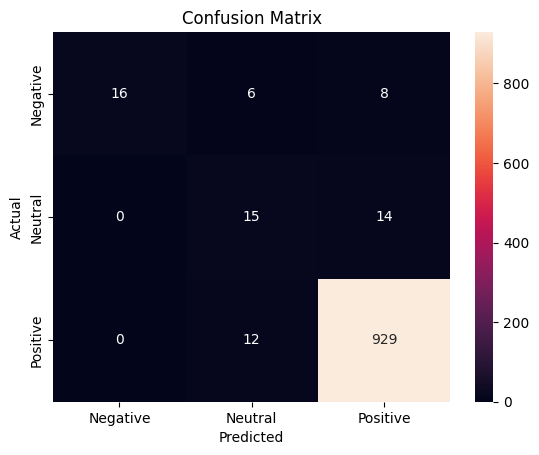

In [ ]:
metrics = trainer.evaluate()
print(metrics)

predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(labels, preds, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

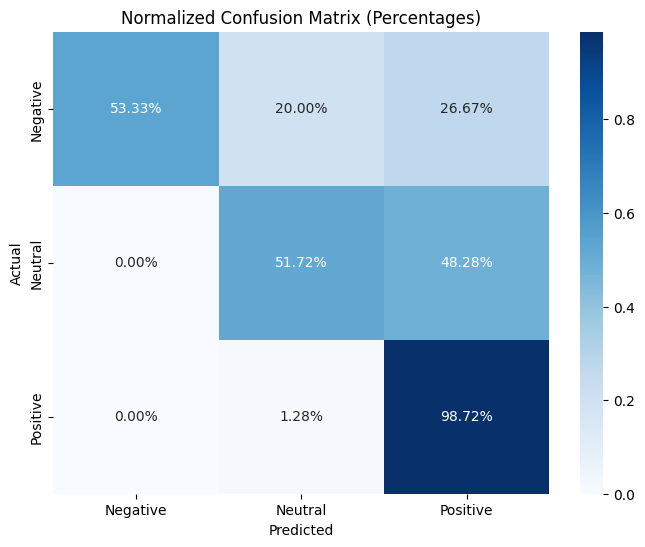

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, preds)

# Normalize the confusion matrix
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Percentages)')
plt.show()


In [ ]:
# Save the model and tokenizer
model.save_pretrained("./sentiment-model-roberta")
tokenizer.save_pretrained("./sentiment-model-roberta")

# 2. Product Category Clustering
